<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/color_spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/4.jpg

--2023-07-03 06:17:55--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/4.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32106 (31K) [image/jpeg]
Saving to: ‘4.jpg’

4.jpg               100%[===================>]  31.35K  --.-KB/s    in 0.003s  

2023-07-03 06:17:56 (9.55 MB/s) - ‘4.jpg’ saved [32106/32106]



## more about RGB(or BGR) images

In [8]:
img=cv2.imread('./4.jpg')
B=img[:,:,0]
G=img[...,1]
R=img[...,2]

# یا میتوان از این دستور استفاده کرد

In [9]:
b,g,r=cv2.split(img)

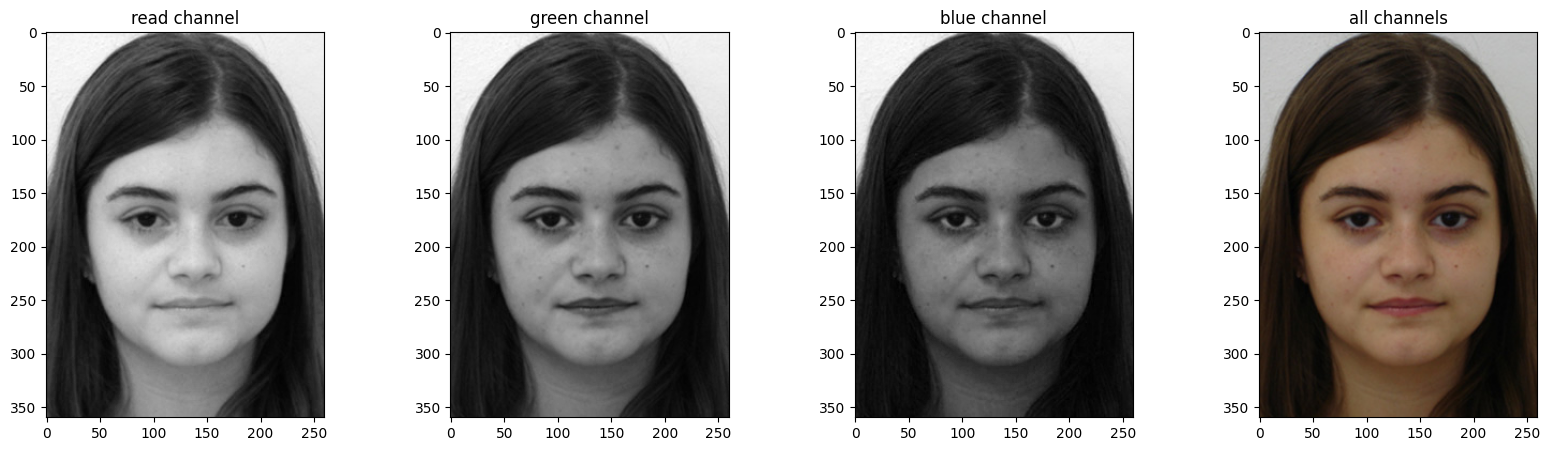

In [14]:
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title('read channel');
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title('green channel');
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title('blue channel');

plt.subplot(144);plt.imshow(img[...,::-1]);plt.title('all channels');

# کردن تصویر merge

In [16]:
merged=cv2.merge([b,g,r])

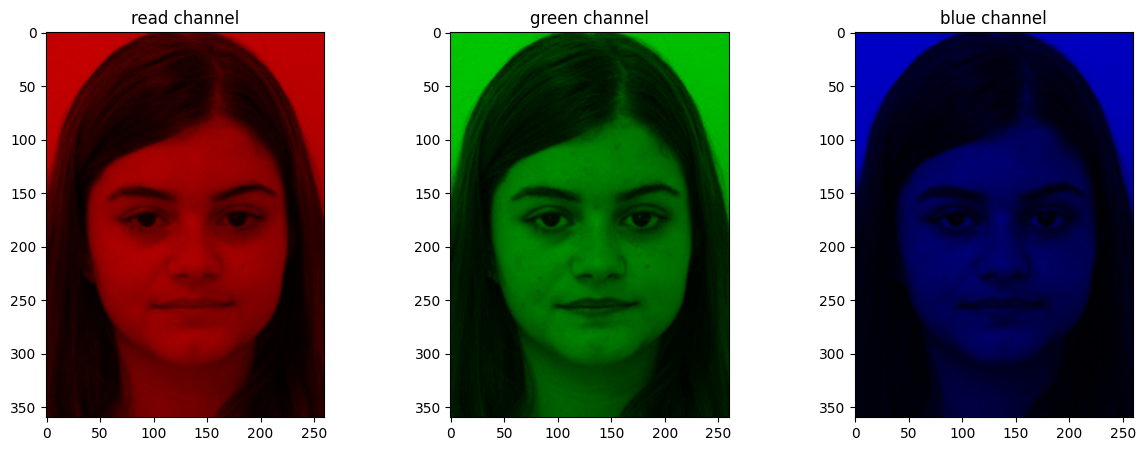

In [19]:
zeros=np.zeros_like(r,'uint8')
red=cv2.merge([zeros,zeros,r])
green=cv2.merge([zeros,g,zeros])
blue=cv2.merge([b,zeros,zeros ])

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(red[...,::-1]);plt.title('read channel');
plt.subplot(142);plt.imshow(green[...,::-1]);plt.title('green channel');
plt.subplot(143);plt.imshow(blue[...,::-1]);plt.title('blue channel');
